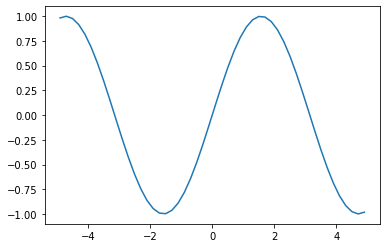

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlowに統合されたKerasを使用
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# -4.9から4.9までの50要素の等差数列(0.2間隔)
x_sin = np.linspace(-4.9, 4.9)
y_sin = np.sin(x_sin)
plt.plot(x_sin, y_sin)
plt.show()

説明変数xと目的変数yの定義

In [2]:
NUM_RNN = 10  # 1時系列のデータ数
NUM_DATA = len(x_sin) - NUM_RNN # 今回は40(=50-10)
x = []
y = []

for i in range(NUM_DATA):
    x.append(y_sin[i:i+NUM_RNN])      # 説明変数
    y.append(y_sin[i+1:i+NUM_RNN+1])  # 正解データなので1ずらした値

else:
    x_train = np.array(x).reshape(NUM_DATA, NUM_RNN, 1) # 入力を(サンプル数、時系列の数、入力層のニューロン数)にする
    y_train = np.array(y).reshape(NUM_DATA, NUM_RNN, 1) # 説明変数(x_train)と同様のshape

モデルの定義

In [3]:
NUM_DIM = 8  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(SimpleRNN(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 8)             80        
_________________________________________________________________
dense (Dense)                (None, 10, 1)             9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
5/5 [==============================] - 1s 4ms/step - loss: 0.3074
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1506
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1231
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0933
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0827
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 11/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0585
Epoch 12/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0582
Epoch 13/20
5/5 [==============================] - 0s 4ms/step - loss: 0.

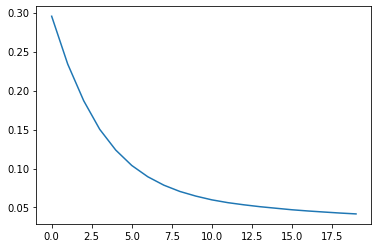

In [4]:
history = model.fit(x_train, y_train, epochs=20, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

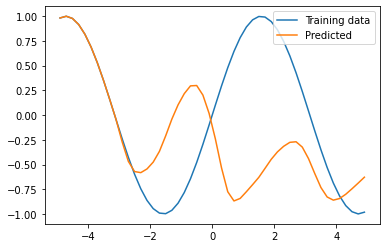

In [6]:
# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 2/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 3/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 4/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 6/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 9/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 10/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 11/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 12/40
5/5 [==============================] - 0s 6ms/step - loss: 0.0178
Epoch 13/40
5/5 [==============================] - 0s 3ms/step - loss: 0.

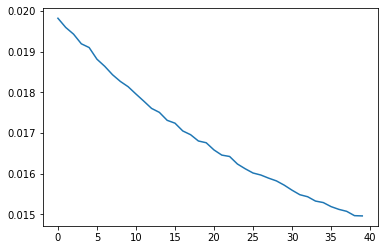

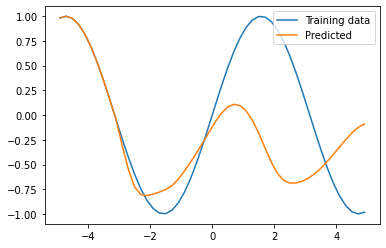

In [8]:
history = model.fit(x_train, y_train, epochs=40, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 2/60
5/5 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 3/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 4/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 5/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 6/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 7/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 8/60
5/5 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 9/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 10/60
5/5 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 11/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 12/60
5/5 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 13/60
5/5 [==============================] - 0s 3ms/step - loss: 0.

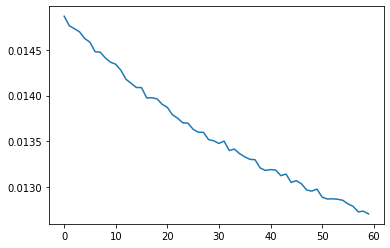

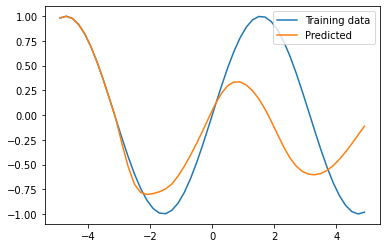

In [9]:
history = model.fit(x_train, y_train, epochs=60, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 2/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 3/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 4/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 5/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 6/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 7/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 8/80
5/5 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 9/80
5/5 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 10/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 11/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 12/80
5/5 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 13/80
5/5 [==============================] - 0s 3ms/step - loss: 0.

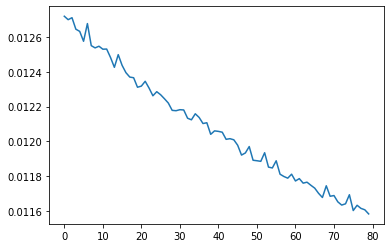

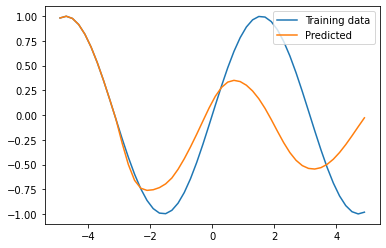

In [10]:
history = model.fit(x_train, y_train, epochs=80, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

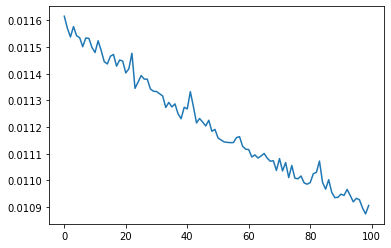

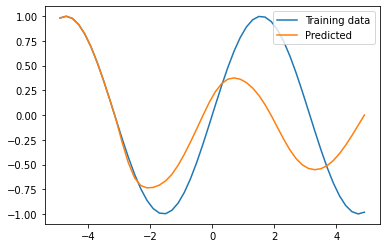

In [11]:
history = model.fit(x_train, y_train, epochs=100, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

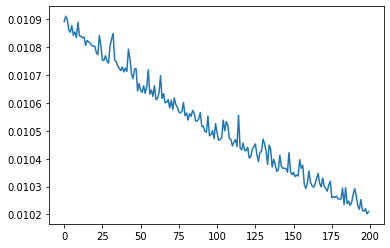

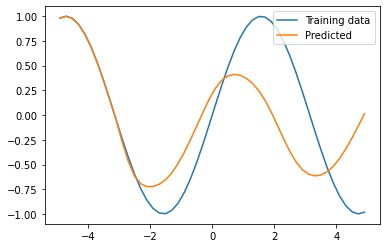

In [12]:
history = model.fit(x_train, y_train, epochs=200, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 11/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 12/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 13/300
5/5 [==============================] - 0s 3ms/st

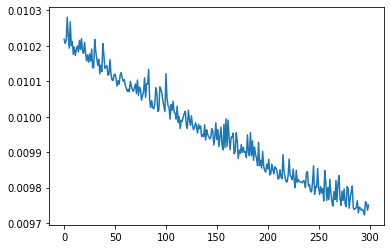

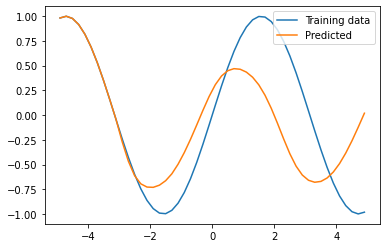

In [13]:
history = model.fit(x_train, y_train, epochs=300, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 12/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

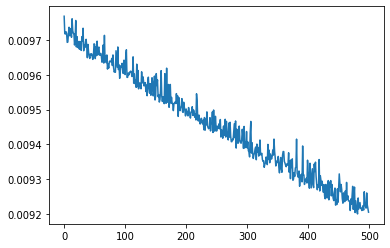

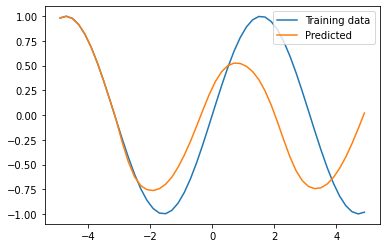

In [14]:
history = model.fit(x_train, y_train, epochs=500, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()

LSTM

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



NUM_DIM = 8  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(LSTM(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 8)             320       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2488
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2339
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2266
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2200
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2153
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2087
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2034
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1993
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 11/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1897
Epoch 12/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1862
Epoch 13/20
5/5 [==============================] - 0s 3ms/step - loss: 0.

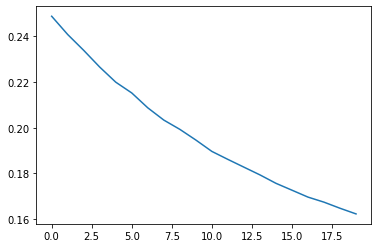

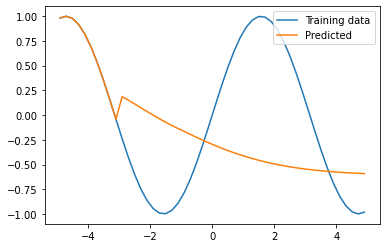

In [17]:
history = model.fit(x_train, y_train, epochs=20, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Epoch 1/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1603
Epoch 2/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 3/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1560
Epoch 4/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1545
Epoch 5/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1525
Epoch 6/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1507
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1476
Epoch 9/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1462
Epoch 10/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1449
Epoch 11/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1436
Epoch 12/40
5/5 [==============================] - 0s 3ms/step - loss: 0.1424
Epoch 13/40
5/5 [==============================] - 0s 3ms/step - loss: 0.

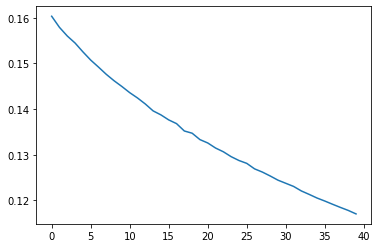

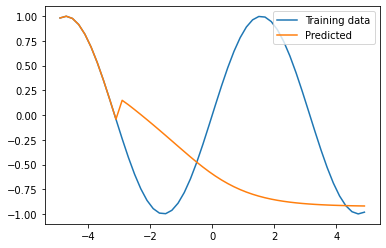

In [18]:
history = model.fit(x_train, y_train, epochs=40, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Epoch 1/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1165
Epoch 2/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1156
Epoch 3/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1148
Epoch 4/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1142
Epoch 5/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1135
Epoch 6/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 7/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1120
Epoch 8/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1114
Epoch 9/60
5/5 [==============================] - 0s 4ms/step - loss: 0.1108
Epoch 10/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1101
Epoch 11/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1096
Epoch 12/60
5/5 [==============================] - 0s 3ms/step - loss: 0.1090
Epoch 13/60
5/5 [==============================] - 0s 3ms/step - loss: 0.

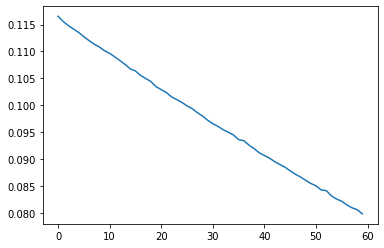

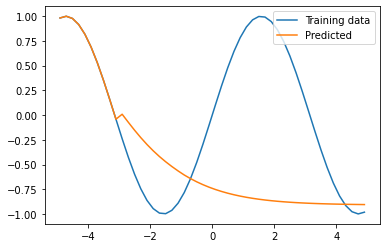

In [19]:
history = model.fit(x_train, y_train, epochs=60, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Epoch 1/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 2/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 3/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 4/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 5/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 6/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 7/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 8/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 9/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 10/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 11/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 12/80
5/5 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 13/80
5/5 [==============================] - 0s 3ms/step - loss: 0.

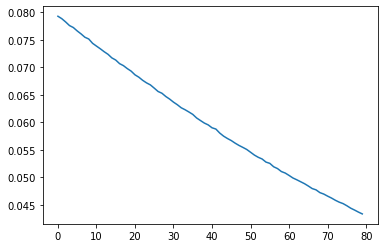

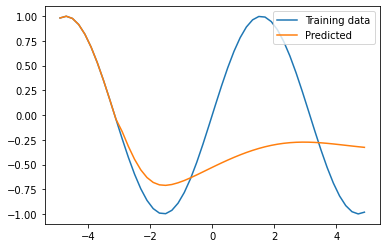

In [20]:
history = model.fit(x_train, y_train, epochs=80, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0427
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0414
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0405
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

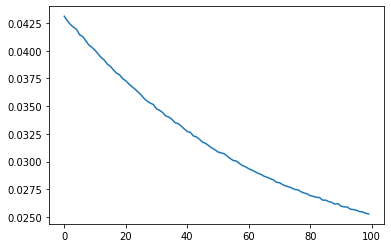

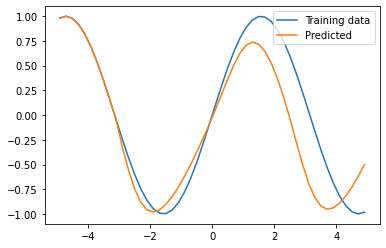

In [21]:
history = model.fit(x_train, y_train, epochs=100, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0248
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0247
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

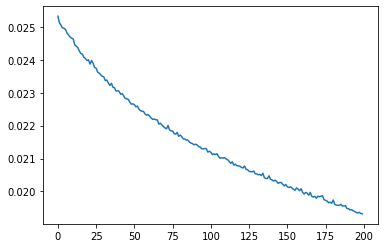

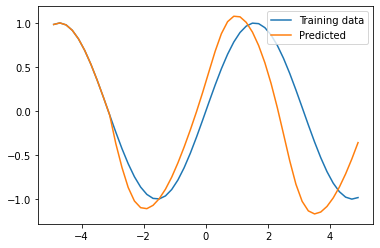

In [22]:
history = model.fit(x_train, y_train, epochs=200, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 16)            1152      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.4326
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4174
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3684
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3568
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3386
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3277
Epoch 7/100
5/5 [=============================

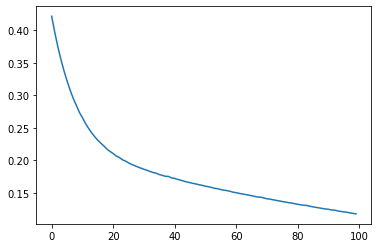

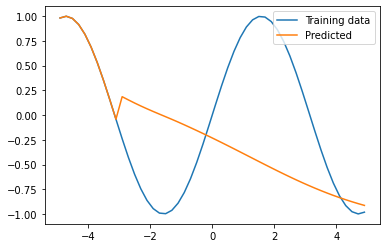

In [23]:
NUM_DIM = 16  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(LSTM(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")
model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 32)            4352      
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.5613
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5248
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4782
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4640
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4062
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3994
Epoch 7/100
5/5 [=============================

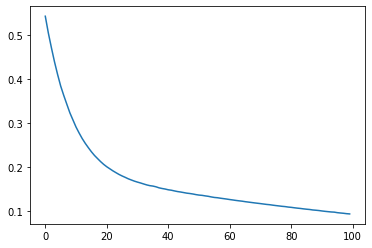

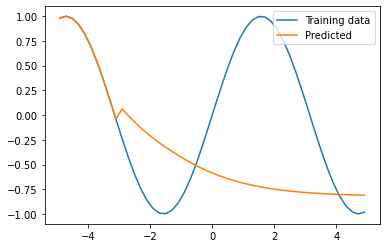

In [24]:
NUM_DIM = 32  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(LSTM(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")
model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 8)             320       
_________________________________________________________________
dense_4 (Dense)              (None, 10, 1)             9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.4996
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4720
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4385
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4154
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4396
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4104
Epoch 7/100
5/5 [==============================] -

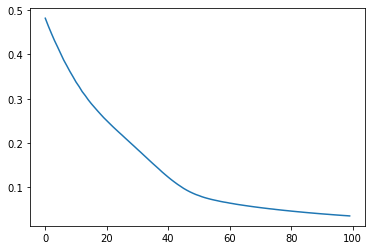

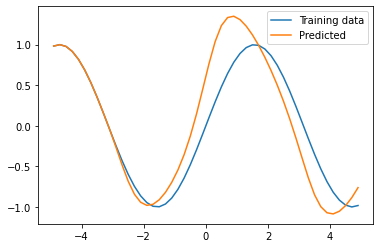

In [25]:
NUM_DIM = 8  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(LSTM(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)  

# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()
